# The Convolutional Neural Network

## Learning objectives

1. Understand the principles behind the creation of the convolutional network
2. Gain a intuitive understanding of the convolution (feature map) and pooling (subsampling) operations
3. Develop a basic code implementation of the LeNet-5 and AlexNet netoworks in Python
4. Identify what kind of problems can be approached with the convolutional network architecture

## Historical and theoretical background

### Hubel and Wiesel

Rosenblatt's photo-perceptron (1958) was the first neural network model attempting to emulate human visual and perceptual capacities. Unfortunetaly, little was known at the time about the mammalian visual cortex that could inform Rosenblatt's work. Consequently, the photo-perceptron architecture was inspired by a very coarse idea of how the information flows from the eyeballs to be processed by the brain. This changed fast in the years following the introduction of the perceptron. 

In 1962, [David H. Hubel](https://en.wikipedia.org/wiki/David_H._Hubel) and [Torsten Wiesel](https://en.wikipedia.org/wiki/Torsten_Wiesel) published one the major breaktroughts in the neurophysiology of the visual cortex: **the existence of orientation selectivity and columnar organization**. This is what they did: they placed tiny microelectrode in a single neuron in the primary visual cortex (V1) of an anesthetized cat, and proyected light and dark dots into the cat's eye. It did not work at all, they could not get a response from the neuron. But, they had a lucky accident. Since they were using a slide projector to show the dots, the *margin of the slide* with the dot also was projected into the cat's ayes and bam! the neuron fired. From there, they experimented with light and dark bars in different orientations, which led them to propose the existence of **three types of cells in the visual cortex**:

1. **simple cells**, that fire at higher (or lower) rate depending on the bar orientation. Sometimes called "line detectors".
2. **complex cells** that fire in response to a wider variety of orientations, yet, they still show a preference (higher firing rate) to certain orientations. Sometimes are called "motion detectors". Importantly, these cells receive input from several *simple cells*. 
3. **hypercomplex cell**, characterized by reacting to "stopped" oriented edges, this is, edges that are in motion and sttop. Again, these cells receive input from several *complex cells*.

Importantly, there three types of cells are **hierarchically organized**. Keeps this in mind as it'll become important later. Altogether, these discoveries were the basis of the work that granted them the Nobel Prize in Physiology in 1981. [Here](http://www.youtube.com/watch?v=jw6nBWo21Zk) is short video from their experiments.

### Fukushima's Neocognitron

The work of Hubel and Wiesel served as the basis for the precursor of modern convolutional neural netwroks: **Fukushima's Neocognitron** (1980). [Kunihiko Fukushima](https://en.wikipedia.org/wiki/Kunihiko_Fukushima), a japanese computer scientist, developed the the Neocognitron idea while working at the [NHK Science & Technology Research Laboratories](https://en.wikipedia.org/wiki/NHK_Science_%26_Technology_Research_Laboratories). He did this by implementing the simple-cells and complex-cells discovered by Hubel and Wiesel in a multilayer neural network architecture. **Figure X** shows a simplified diagram of the Neocognitron with 3 layers (4 if you count the inputs). 

<center> Figure X: Simplified Neocognitrone </center>

<img src="./images/cov-net/neocognitron.svg">

The general idea behind the Neocognitron is the following: the **input layer $L_0$ works as the retina**, reading the raw input pattern. Then, each cell in a $S_1$ patch "reads" a sub-section of the input image based on a "preference" for certain type of pattern. Any given layer $L_n$ will have several of this $S_j$ patches as a collection of **feature "filters"**. Some may detect a diagonal line, while other a small triangle, or a corner, or something else. Each $S_j$ patch connects to a $C_k$ cell, and such a cell fires if gets any positive input from its corresponding patch. This process is also known as **"pooling"**. This cycle of "feature" detection and "pooling" is repeated as many times as intermediate layers in the network. The last layer correspond to the output, where some neuron will fire depending of the input pattern. Mathematically, "feature detection" is accomplished by multiplying the input by a fix matrix of weights, whereas "pooling" corresponding to taking an average of the connected patch of S-cells. 

You may have noticed that the behavior of the S-cells and C-cells replicate (to some extent) what Hubel and Wiesel found in their experiments. The great thing about this architecture is that is **robust to shifts in the input image**: you can move the image around and the combination of "feature detection" and "pooling" will detect the precense of each part of the image regardless of its position. **Figure X** exemplifies this characteristic.

<center> Figure X <\center>

<img src="./images/cov-net/neocognitron-cells.svg">

The neocognitron is also **robust to deformation**: it will detect the object even if it's enlarged, reduced in size, or blurred, by virtue of the same mechanism that allows robustness to positional shifting. It is also important to notice that the pooling operation will "blur" the input image, and the fact that C-cells take the average of its corresponding S-cells makes the pooling more robust to random noise added to the image. [Here](http://www.youtube.com/watch?v=Qil4kmvm2Sw) you can find a short video explaining the basics of the Neocognitron as well. 

In sum, the Neocognitron stablished the following principles: 

- S-cells extract simple features
- C-cells combine and subsample S-cells extracted features
- Image features are learned and combined to produce richer representations
- The image recognition process is hierarchically organized


If you are familiar with convolutional neural networks, you may be wondering what is the difference between the Neocognitron and later models like Yann LeCun's LeNet (1989), since they look remarkably similar. They main (but not only) difference is the training algorithm: **the Neocognitron does not use backpropagation**. At the time, backpropagation was not widely known as a training method for multilayer neural networks, reason why Fukushima never use it. Instead, he trained his model by using an unsupervised learning approach. Regardless, the Neocognitron laid the groundwork of modern neural network models of vision and computer vision more generally.

### LeCun's LeNet

The architecture today known as the convolutional neural network was introduced by [Yann LeCun](http://yann.lecun.com/) in 1989. Although LeCun was trained as an Electrical Engineer, he got interested in the idea of building intelligent mahines from early on in his undergradute education by reading a book about the [Piaget vs Chomsky debate on language acquisition](https://www.sciencedirect.com/science/article/abs/pii/0010027794900345). In that book, several researchers argued in favor or against each authors view. Among those contributors was [Seymour Papert](https://en.wikipedia.org/wiki/Seymour_Papert) who mentioned Rosenblatt's perceptron in his article, which inspired LeCun to learn about neural networks for the first time. Ironically, this was the same Seymour Papert that published the book (along with Marvin Minsky) that broguht the demise on the interest on neural networks in the late '60s. I don't belive in karma, but this certainly looks like it. 

Eventually, LeCun became postdoc at the University of Toronto with Geoffrey Hinton and started to prototype the first convolutional network. By the late '80s LeCun was working at [Bell Labs](https://en.wikipedia.org/wiki/Bell_Labs) in New Jersey, place where he and his colleagues developed at published the **first convolutional neural network trained with backpropagation**, the **"LeNet"**, that could effectively recognize handwritten zip codes from US post office. This early convolutional network went through several rounds of modifications and improvements (LeNet-1, LeNet-2, etc.), until by 1998 the [LeNet-5](http://yann.lecun.com/exdb/lenet/) reached test error rates of 0.95% (99.05 of classification accuracy) in the [MNIST dataset of handwritten digits](http://yann.lecun.com/exdb/mnist/). 

#### The convolution opertion: feature detection

I'll begin by schematically describing the LeNet-5 model and leave the mathematics for the next section. This conceptual explanation should be enough to have a higher-level understanding of the model but not necesarilly to implement a convolutional network.

<center> Figure X: LeNet-5 Architecture <\center>

<img src="./images/cov-net/LeNet.svg">

The general architecture of the LeNet-5 is shown in **Figure X**. The input layer $L-0$ acts like the retina receiving images of characters that are centered and size-normalized (otherwise, some images may not fit in the input layer). The next layer $L-1$ is composed of several **feature maps**, which have the same role that the Neocognitron simple-cells: to extract simple features as oriented edges, corners, end-points, etc. In practice, a feature map is a squared matrix of **identical weights**.  Weights *within* a feature map pattern need to be identical so they can detect *the same* local feature in the input image. Weights *between* feature maps patterns are different so they can detect *different* local features. Each unit in a feature map has a **receptive field**. This is, a small $n \times n$ sub-area of the input image that can be "perceived" by a unit in the feature map at any given time.  

Feature maps and receptive fields sounds complicated. Here is a methaphor thay may be helpful: imagine that you have 6 flashlights with a *square* beam of light. Each flashlight has the special quality of revealing certain "features" of images drawn with invisible ink, like corners or oriented edges. Also imagine that you have a set of images that were drawn witn invisible ink. Now, you need your special flashlights to reveal the hidden character in the image. What you need to do is to carefully iluminate each section of the invisible image, from *right to left and top to bottom*, with each of your 6 flashlights. Once you finish the process, you should be able to put together all the little "features" revealed by each flashlight to compose the full image shape. Here, the square beam of light sliding over each pixel represents the aforementioned *receptive field*, and each flashlight represents a *feature map*. 

**Figure X** shows a simplified represention of the feature detection process (assuming that each time a pixel in the input image *matchs* a pixel in the feature detector we add a value of 1, athough in practice it can be any real-valued scalar). In this example we use a **stride** of 1, meaning that we shift the receptive field by 1 pixel (to the right or down) for each cell in the feature map.

<center> Figure X: Feature detection (convolution) <\center>

<img src="./images/cov-net/convolution.svg">

The process of sliding over the image with the receptive field (sometimes called *kernels*) of feature maps equals to a mathematical operation called **convolution** (technically, equals to *cross-correlation*, more about that later), hence the name **convolutional network**. The full convolution operation involves repeating the process in **Figure X** for each feature map. If you are wondering how do you come up with appropiated features detectors, the answer is that you don't need to: *the feature maps weights are learned in the training process*. More on the mathematics of this later.

#### The pooling operation: subsampling

Once the convolution operation is done, what we have learned is whether a feature is present in the image or not. Now, knowing that a collection of features is present in an imagine won't tell us, by itself, which image they correspond to. What we need to know is their **approximate position relative to each other**. For instance, if we know that we have a "curvy horizontal line" at the center-bottom, a "curvy vertical line" at the middle-right, a "stright vertical line" at upper-left, and a "stright horizontal line" at the center-top, we should be able to tell we have a "5". This is even more important considering that real-life images like handwritten numbers have considerable *variability* in their shape. No two individuals write numbers in the exact same manner. Hence, we want our network to be as *insensitive as possible* to the absolute position of a feature, and as *sensitive as possible* to its relative position. This is sometimes refered as **invariance to local translation**. One way to accomplish this is by **reducing the spacial resolution of the image**. This is what **sub-sampling** or **pooling** does. 

The are many ways to sub-sample an image. In the LeNet-5, this operation performs a **local averaging** of a section of the feature map, effectively *reducing the resolution* of the feature map as a whole, and the sensitivity of the network to shifts and distorsions in the input image. A colloquial example is what happens when you "pixelate" an image like in **Figure X**.

<center> Figure X: sub-sampling effect <\center>

<img src="./images/cov-net/pixelated.svg">

A sub-sampling layer will have as many "pixelated" feature maps as "normal" feature maps in the convolutional layer. The **mechanics of sub-sampling** are as follow: again, we have $n \times n$ receptive field that "perceives" a section of the "normal" feature map and connect to a unit in the "pixelated" feature map. This time, there is no overlap between each "stride" of the receptive field: each unit is connected to a *non-overlapping section* of the original feature map. You can think on this as taking "strides" of a size equal to $n$, e.g., for a $3 \times 3$ feature map, we take a stride of $3$. Then, we take weighted average of each pixel in the receptive field, and pass the resulting sum through a sigmoid function (or any other non-linear function). The *weights* in the weigthed average are also parameters that the network learns over training. **Figure X** shows this process for a *single* sub-sampled feature map.

<center> Figure X: Sub-sampling (pooling)<\center>

<img src="./images/cov-net/pooling.svg">

The result of sub-sampling is another grid of numbers (note that the numbers in **Figure X** are made up). We went from a $12 \times 12$ input image, to a $3 \times 3$ feature map after convolution and pooling (keep in mind that I intentionally reduced LeNet-5 original dimnensions to simplify the examples). Since in our original example we had 6 features map, we need to repeat the process in **Figure X** 6 times, one of each feature map.

The next sub-sampling hidden layer $S_2$ increases the number of feature maps compared to $S_1$. If you were to add more sets of $S_n$ and $C_n$ hidden layers, you will repeat this altenating pattern again: *as the spatial resolution is reduced (by pooling), the number of feature maps in the next layer is increased*. The idea here is to **compensate the reduction in spatial resolution by increasing the richness of the learned representations** (i.e., more feature maps).

Once we are done with the sequence of convolution and pooling, the network implements a traditional fully-connected layer as in the [multi-layer perceptron](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html). The first fully-connected $F_1$ layer has the role of **"flattening"** the $C_2$ pooling layer. Remember that fully-connected layers take a input vector, and the dimensions of the LeNet-5 $C_2$ layer are a $5 \times 5 \times 16$ tensor, this is, sixteen 5 by 5 feature maps. The dimensionality of the first  fully-connected layer is $120$, which is the result of another convolution. The next one hidden layer $F_2$ "compress" the output even further into a vector of size $84$. Finally we have the **output-layer** the implements a **euclidean radial basal function** (RBD) with 10 neurons to perform the classification of numbers (0-9).

### AlexNet

The LeNet-5 perfomance in the MNIST dataset was impressive but not out of the ordinary. Others methods like the Suport Vector Machines could reach [similar or better perfomance at the time](http://yann.lecun.com/exdb/mnist/). Training neural networks was still costly and complicatd compared to others machine learning techniques, hence the interest in neural nets faded in the late '90s again. However, serveral research group continued to work in neural networks. The next big breaktrough in computer vision came in 2012  when Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton introduced the ["AlexNet"](https://en.wikipedia.org/wiki/AlexNet), a convolutional neural network that won the ["ImageNet Large Scale Visual Recognition Challenge"](https://en.wikipedia.org/wiki/ImageNet#ImageNet_Challenge) for a wide margin, surprising the entire computer vision community.

The main innovation introduced by AlexNet compared to the LeNet-5 was **its sheer size**. AlexNet main elements are the same: a sequence of convolutional and pooling layers with a couple of dense layers at the end (plus some regularization tricks). The LeNet-5 has two sets of convolutional and pooling layers, two fully-connected layers, and a RBD classifier at the end. AlexNet has five convolutional layers, three pooling layers, three fully-connected layers, and a softmax classifier output layer. The training time and dataset was larger as well. All of this was possible because of the availability of more raw computational processing (particularly [Graphics Processing Units (GPUs)](https://en.wikipedia.org/wiki/Graphics_processing_unit)), and larger datasets (because of the internet). Diagramming AlexNet is complicated because the architecture its too large. The original AlexNet is really complicated because they needed to split the network in multiples GPUs, wich is not necessary today. I'll use simplified notation to describe AlexNet and compare it with LeNet-5, as shown in **Figure X**.

<center> Figure X: AlexNet and LeNet architectures <\center> 

<img src="./images/cov-net/alexnet.svg">

Each layer in AlexNet is three dimensional because it was designed to classify 1000 *color images* (LeNet-5 classified 10 grey-scale digits). The dimensions represent *width x height x RGB* (red, green, and blue) color values. This type of 3-D arrays of numbers are often refered as [mathematical tensors](https://en.wikipedia.org/wiki/Tensor). The pooling operation is done by taking the maximun value in the receptive field instead of the average of all units, which is known as **max pooling**. The pattern of connectivity between convolutional and pooling layers is different to the one in LeNet-5 too. Other than that, AlexNet utilize the same building blocks and operations than LeNet-5.

## Neural network models of vision and computer vision drifting apart

If you ask to a random researcher in computer vision about the correspondene betwen the human visual/perceptual system and convolutional nets, the most likely answer would be something like: "*Well, CNNs are roughly inspired in the brain but aren't actual models of the brain. I care about solving the problem artificial vision by any means necessary, regardless of the biological correspondance to human vision, more or less in the same manner we solved flying withouth having to imitate birds flapping*". Or some version of that. This talks to how **computer vision has become an independent area of research with its own goals**. Most researchers are fully aware that many of the design properties of modern convolutional nets are not biologically realistic. Beyond the parallels with human vision, strictly speaking, LeNet-5 and AlexNet are designed to maximize object-recognition perfomance, not biological-realism. And that's is perfectly fine. For instance, the LeNet 5 paper (1998) was published in the context of the debate between traditional pattern recognition with handcrafted features vs the automated learning-based approach of neural nets. Nothing was said about human perception. However, from our perspective, the issue of **whether convolutional nets are useful model of human perception and vision** is critical. This is a open debate. Many researchers do beleive that convolutionls nets are useful models for human vision and perception, and there is a long list of [scientific articles trying to show this point](https://www.mitpressjournals.org/doi/abs/10.1162/jocn_a_01544). I won't review those arguments now. My point is to highlight the fact that what I'll describe next are "coarse" models attempting to approximate human abilities in narrow settings, not full-blown models of human vision.

## Mathematical formalization

Next, I'll describe the mathematics for the LeNet-5, with a few references to AlexMet operations. This architecture of LeNet-5 can be described by the following:

- convolution function (for hidden layer) 
- non-linear transformation function (for hidden layer)
- pooling function (for hidden layer)
- linear function (for fully-connected layers)
- euclidean radial basis (RBF) function (for the output)
- cost function (to compute overall error)
- learning procedure (i.e., backpropagation)

### Convolution function

The convolution operation *convolutes* pairs of functions. Here I'm using the plain meaning of "convoluted": to interwine or twist things together. In the neural network context, the functions we convolute together are the **input function** $P$ and the **kernel function** $K$ (remember that *kernel* is another way to call the *receptive field* of a feature map). For the 2-dimensional inputs as in LeNet-5, the $P_{ij}$ function contains the 2-dimensional values for the input image, which in our case are grayscale values between 0 (white) and 255 (black). The $K_{mn}$ function contains the 2-dimensional values for the kernel, this is, the matrix of weights $W_{mn}$ to be learned by the network. The **output** of the convolution is the feature map $F_{mn}$ in the next layer. In practice, the convolution operation is a **convoluted linear operation**, i.e., a weighted sum.

The convolution formula has different forms depending on the context. In the neural network context, we will compute a **discrete convolution**. The **convolution operator** is conventionally represented by the **$\bf{*}$ symbol**. Hence, we define the convolution between $P$ and $K$ as:

$$
F_{mn}= S(i,j) = (P*K)_{ij} =\sum_m\sum_nP_{i-m, j-n} * K_{m,n}
$$

Where ${ij}$ are the width and length of the input image, and ${mn}$ are the width and length of the kernel.

Technically, LeNet-5 also adds a "bias" $b$ to each convolution, so the full expression becomes:

$$
F_{mn}= S(i,j) = b + (P*K)_{ij}  = b + \sum_m\sum_nP_{i-m, j-n} * K_{m,n}
$$

I'll ignore the $b$ term since it's not part of a convolution operation and it's not relevant for its explanation.

To apply a convolution the most important part is **to get the indices right**. We will work with a $3 \times 3$ input image example. There are multiple index conventions floating around the internet. I will use the following for convolution:

$$P=
\begin{bmatrix}
p_{-1,1} & p_{0,1} & p_{1,1} \\
p_{-1,0} & p_{0,0} & p_{1,0} \\
p_{-1,-1} & p_{0,-1} & p_{1,-1}
\end{bmatrix}
$$

For a $2 \times 2$ kernel that can't be centered at $0$, we will fix the bottom-left entry at $(0,0)$ as:

$$K=
\begin{bmatrix}
k_{0,1} & k_{1,1}\\
k_{0,0} & k_{1,0}
\end{bmatrix}
$$

I'll use a trick to make the convolution operation clearer. I'll replace the entries with actual numbers and overlay the matrices in a cartesian plane as in **Figure X**:

<center> Figure X <\center>

<img src="./images/cov-net/cartesian-matrix.svg">

Now, remember that we want to compute a feature map $F$ with dimensions equalt to $K$. Consequently, we need to compute 4 convolutions:

$$
F_{00} = S(i=0,j=0) \\
F_{01} = S(i=0,j=1) \\
F_{10} = S(i=1,j=0) \\
F_{11} = S(i=1,j=1)
$$ 

To obtain:

$$F=
\begin{bmatrix}
f_{0,1} & f_{1,1}\\
f_{0,0} & f_{1,0}
\end{bmatrix}
$$

Let's compute $F_{00} = S(i=0,j=0)$. Table X shows the entries to be multiplied and added together when we follow the double summtion $\sum_m\sum_nP_{i-m, j-n} * K_{m,n}$

<center> Table X <\center>

| i | j | m | n | i-m    | j-n    | P<sub>i-m,j-n</sub> | K<sub>m,n</sub> |
|---|---|---|---|--------|--------|---------------------|-----------------|
| 0 | 0 | 0 | 0 | 0-0=0  | 0-0=0  | P<sub>0,0</sub>     | K<sub>0,0</sub> |
| 0 | 0 | 0 | 1 | 0-0=0  | 0-1=-1 | P<sub>0,-1</sub>    | K<sub>0,1</sub> |
| 0 | 0 | 1 | 0 | 0-1=-1 | 0-0=0  | P<sub>-1,0</sub>    | K<sub>1,0</sub> |
| 0 | 0 | 1 | 1 | 0-1=-1 | 0-1=-1 | P<sub>-1,-1</sub>   | K<sub>1,1</sub> |

We will color-code each entry in the matrices and compute the value for $F_{00}$ as in **Figure X**:

<center> Figure X <\center>

<img src="./images/cov-net/cartesian-matrix-1.svg">

We can fill in with the first $F_{00}$ entry (here is where you could add $b$ to the summation result):

$$F=
\begin{bmatrix}
f_{0,1} & f_{1,1}\\
142.5 & f_{1,0}
\end{bmatrix}
$$

If you observe the indices carefully, you'll notice the $P$ indices are $K$ indices "flipped". Taking $-K$ (i.e., $-m,-n$) **reflects** the indices on the horizontal and vertical axes, whereas $j,i$ **offset** the indices on their correspondign axes. In the last example there was no offset becasue both $j,i$ equal $0$. **Figure X** shows the effects of reflecting by taking $-k$ and offsetting vertically and horizontally by different values of $j,i$:

<center> Figure X <\center>

<img src="./images/cov-net/cartesian-matrix-rotations.svg">

Let's see what happens when we compute the next feature map entry $F_{01}$:

| i | j | m | n | i-m    | j-n   | P<sub>i-m,j-n</sub> | K<sub>m,n</sub> |
|---|---|---|---|--------|-------|---------------------|-----------------|
| 0 | 1 | 0 | 0 | 0-0=0  | 1-0=1 | P<sub>0,1</sub>     | K<sub>0,0</sub> |
| 0 | 1 | 0 | 1 | 0-0=0  | 1-1=0 | P<sub>0,0</sub>     | K<sub>0,1</sub> |
| 0 | 1 | 1 | 0 | 0-1=-1 | 1-0=1 | P<sub>-1,1</sub>    | K<sub>1,0</sub> |
| 0 | 1 | 1 | 1 | 0-1=-1 | 1-1=0 | P<sub>-1,0</sub>    | K<sub>1,1</sub> |

Graphically, this looks like:

<center> Figure X <\center>

<img src="./images/cov-net/cartesian-matrix-2.svg">

We can fill in with the second entry on $F_{01}$:

$$F=
\begin{bmatrix}
195 & f_{1,1}\\
142.5 & f_{1,0}
\end{bmatrix}
$$

The pattern fromhere is always the same: flipp, offset, overlay, multiply, and add. If we follow the pattern for $F_{11}$ and $F_{10}$, $F$ results in:

$$F=
\begin{bmatrix}
195 & 241\\
142.5 & 222
\end{bmatrix}
$$

### Convolution in practice: cross-correlation

This may come as a surprise to you but in practice several deep learning libraries like [MXNet](https://beta.mxnet.io/api/ndarray/_autogen/mxnet.ndarray.Convolution.html) and [Pytorch](https://pytorch.org/docs/stable/nn.html#convolution-layers) **DO NOT implement convolutions** but a closely related operation called **cross-correlation** (although the authors insist on calling it convolution). The cross-corrleation operation is defined as:

$$
F_{mn}= S(i,j) = (P \star K)_{ij} =\sum_m\sum_nP_{i+m, j+n} \star K_{m,n}
$$

If you pay close attention to $K_{i+m, j+n}$ you'll see that the only difference is we are replacing the $-$ symbol with a $+$ symbol. 

Now, If we keep the same convention of centering the input image at zero, we will get into trouble. For instance, **Table X** shows the values for $i=0, j=1$:

<center> Table X <\center>

| i | j | m | n | i+m   | j+n   | P<sub>i+m,j+n</sub> | K<sub>m,n</sub> |
|---|---|---|---|-------|-------|---------------------|-----------------|
| 0 | 1 | 0 | 0 | 0+0=0 | 1+0=1 | P<sub>0,1</sub>     | K<sub>0,0</sub> |
| 0 | 1 | 0 | 1 | 0+0=0 | 1+1=2 | P<sub>0,2</sub>     | K<sub>0,1</sub> |
| 0 | 1 | 1 | 0 | 0+1=1 | 1+0=1 | P<sub>1,1</sub>     | K<sub>1,0</sub> |
| 0 | 1 | 1 | 1 | 0+1=1 | 1+1=0 | P<sub>2,0</sub>     | K<sub>1,1</sub> |

Now we get $P_{02} \star K_{01}$, which does not make sense since we don't have values at $P_{02}$. One way to address this is by "padding" the input image with zeros like: 

$$P=
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & p_{-1,1} & p_{0,1} & p_{1,1} & 0 \\
0 & p_{-1,0} & p_{0,0} & p_{1,0} & 0\\
0 & p_{-1,-1} & p_{0,-1} & p_{1,-1} & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

Now we have values at $P_{02}$. I personally find such solution sketchy. A better aproach would it be to change the indices of $P$ to be:

$$P=
\begin{bmatrix}
p_{0,2} & p_{1,2} & p_{2,2} \\
p_{0,1} & p_{1,1} & p_{2,1} \\
p_{0,0} & p_{1,0} & p_{2,0}
\end{bmatrix}
$$

Now we have values at $P_{02}$ and no padding is nedded. If you iterate over $\sum_m\sum_nP_{i+m, j+n} \star K_{m,n}$ the indices will work just fine to obtain $F$. 

Notice that in cross-correlation there aren't reflections just offsets. This is how the offsets look now:

<center> Figure X <\center>

<img src="./images/cov-net/cartesian-matrix-cross.svg">

I'll not compute the cross-correlation values. The computation is as simple as overlaying the kernel matrix $K$ on top of the $P$ input matrix and take a weighted sum. This is the reason why you'll see most text in deep learning explain convolutions as "sliding" the kernel over the image taking a stride of X. Essentially, cross-correlation is a **measure of similarity** between the kernel and the input image: *the better the alignment, the higher the cross-correlation value*.

We addressed convolution and cross-correlation in 2 dimensions. Yet, keep in mind that you can use such techniques for problems in 1, 3, or N dimensions, and the mathematics extend naturally to such dimensions as well. 

### A note about convolution and cross-correlation

Before moving to the next section I want to address two questions: **Why to bother with convolutions (or cross-correlation) at all?**, and **Does it matter if I use convolution or cross-correlation?**

Regarding the first question, technically, we could "flatten" the image into a long vector *from the beginning*, and then use a traditional multi-layer perceptron to classify the images. Just imagine aligning each pixel $[p_{00}, p_{01}, ..., p_{ji}]$ one after the other in a long list, such that each pixel becomes a feature. This is way simpler than bothering with convolution or cross-correlation. The short answer is: because the **topological information matters**. In other words, the relative position of each pixel in the grid matters, and we want to **exploit such space-dependence** when learning the network weights. If you train a model to recognize faces, the relative distance between *your eyes* and your *mouth* matters. Knowing that the images has a pair of eyes and a mouth is not enough. Therefore, we want to keep the grid-structure when training the network.

Regarding the second question, the answer is: **no, it does not matter**. Well, it does matter in terms of the implementation, computational complexity, etc. But it does not matter in terms of finding a solution. The training algorithm will **ensure that the appropiate weights are learn** regardless. In short, when you use *convolution* the network will learn a matrix of weights $W$. If you use *cross-correlation* instead, the network will learn a set of weights $-W$, i.e., the weights "flipped".

### Pooling function

After convolution, we "pool" the feature map output. "Pooling" essentially means to compute a summary statistic of a selected region of pixels. There are several pooling modalities: max pooling, average pooling, $L^2$ norm pooling, and others. 

LeNet-5 implements **average pooling**, which is simply the average of the selected region in the feature map. For instance, if we take the feature map $F$:

$$F=
\begin{bmatrix}
195 & 241\\
142.5 & 222
\end{bmatrix}
$$

And we apply average pooling, we get:

$$
M_{mn} = \frac{1}{m \times n} \sum_m\sum_nf_{mn} = \frac{1}{2*2} (142.5 + 222 + 195 + 241) = \frac{1}{4} (800.5) = 200.125
$$

AlexNet implements **max pooling**, which is simply the largest value in the selected region of the feature map:

$$
M_{mn} = max(F) = 222
$$

There is a lot to say about pooling. For are thorough evaluation in the field of object recognition see [Scherer, Muller, and Behnke (2011)](http://ais.uni-bonn.de/papers/icann2010_maxpool.pdf).

### Non-linear transformation function

LeNet-5 implements two non-linear functions: a **sigmoid** after the convolution layer and a **scaled hyperbolic tanget** after the pooling layer. LeC
un et all call the latter "squashing" function.

The **sigmoid** function is defined as:

$$
a = \sigma(f_{mn}) = \frac{1}{1+e^{-f_{mn}}}
$$

The sigmoid has an $S$ shape like in **Chart 1** (the red line indicates the inflection point or threshold):

In [1]:
from scipy.special import expit
import numpy as np
import altair as alt
import pandas as pd
z = np.arange(-5.0,5.0, 0.1)
a = expit(z)
df = pd.DataFrame({"a":a, "z":z})
df["z1"] = 0
df["a1"] = 0.5
sigmoid = alt.Chart(df).mark_line().encode(x="z", y="a")
threshold = alt.Chart(df).mark_rule(color="red").encode(x="z1", y="a1")
(sigmoid + threshold).properties(title='Chart 1')

alt.LayerChart(...)

The **scaled hyperbolic tangent function** is defined as:

$$
\tau(f_{mn}) = A \times \frac{(e^{f_{mn}} - e^{f_{mn}})}{(e^{f_{mn}} + e^{f_{mn}})}    
$$

With:
$$
A = 1.7159
$$

In practice, the scaling factor can be omitted with no relevant side effects, as it's done today. 

The shape of the scaled tanh function is similar to the sigmoid but the tanh can take negative values and the threshold point is at $0,0$:

In [2]:
import numpy as np
import altair as alt
import pandas as pd
z = np.arange(-5.0,5.0, 0.1)
t = np.tanh(z)
df = pd.DataFrame({"t":t, "z":z})
df["z1"] = 0
df["t1"] = -1
tanh = alt.Chart(df).mark_line().encode(x="z", y="t")
threshold = alt.Chart(df).mark_rule(color="red").encode(x="z1", y="t1")
(tanh + threshold).properties(title='Chart 2')

alt.LayerChart(...)

The main reason to use this "squashing" function is to help *learning convergence*. Basically, symmetric functions are beleived to converge faster. For a more complete explanation see *Appendix A* in LeCun et all (1998).

Nowadays, a more popular non-linear function is the **ReLU**, or rectifier linear unit. This is what AlexNet uses. The ReLU simply returns the positive side of the input function or $0$:

$$
r (x) = max(x,0)
$$

The shape of the ReLU is a stright line in the negative side of the number line, and linear function in the positive side:

In [3]:
import numpy as np
import altair as alt
import pandas as pd
z = np.arange(-5.0,5.0, 0.1)
r = np.maximum(z, 0)
df = pd.DataFrame({"r":r, "z":z})
df["z1"] = 0
df["r1"] = -1
tanh = alt.Chart(df).mark_line().encode(x="z", y="r")
threshold = alt.Chart(df).mark_rule(color="red").encode(x="z1", y="r1")
(tanh + threshold).properties(title='Chart 2')

alt.LayerChart(...)

### Linear function

After the second pooling layer, LeNet-5 "flattens" the 2-dimensional matrix into a vector. Then computes a linear function $Z$, this is, the dot product between the weights and the flattened vector, and passes the the result trough the sigmoid. We have seen this function before [here](https://com-cog-book.github.io/com-cog-book/features/adaline.html#Linear-aggregation-function) and [here](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html#Linear-function). It is defined as:

$$
z(f_{mn}) = b + \sum x_n w_{mn}
$$

In matrix notation:

$$
\bf{z} = W^T \times \bf{x}
$$

### Output function

In previous chapters we worked either binary or real-valued outputs. Now we have a multi-class problem. LeNet-5 approaches this by implementing a **euclidean radial basis (RBF) function**. Each output unit computes:

$$
\hat{y_i} = \sum_j (a_j - w_{ij})^2
$$

This equals to compute the Euclidean distance between the input vector $\bf{a}$ (output of the sigmoid) and the parameter vector $\bf{w}$. To understand why this works we need to delve into probability theory, which I'll skip for now since it requires to introduce several new mathematical ideas. In brief, the larger the distance between the input vector $\bf{x}$ and the parameter vector $\bf{w}$, the larger the RBF value output, and the more likely the unit to activate.

In modern neural networks, like AlexNet, multi-class problems are usually approached with a **softmax function** defined as:

$$
\sigma(a)_i = \frac{e^{a_i}}{\sum_{j=1}^K e^{a_j}} \text {  for i} =1,...,K\text{  and}= (z_1,...,z_K)
$$

Let's unpack this: first, we apply the exponential function to each element of the vector $\bf{a}$, and then, we normalize by dividing by the sum of all exponentials values. The normalization constrains the the sum of $\sigma(a)_i$ to 1. Now that we normalized to 1, each element of the output vector **can be interpreted as an activation probability**. This is really convinient, since now we can rank the outputs by its probability. For instance, in a 10-class problem, the unit with the highest value is the most likely value for a given input pattern.

### Cost function

In previous chapters we used the Mean Squared Error (MSE) as a measure of "goodness" (or "badness") of the network predictions. This is not possibble here, since we are working a multi-class problem and the RBD function. The LeNet-5 implements the **Maximun a Posteriori** (MAP) criterion as a cost function, defined as: 

$$
E(W) = \frac{1}{P}\sum_{p=1}^X(\hat{y}_{D^{p}}(X^p, W) + \log(e^{-j} + \sum_i e^{-\hat{y}(X^p, W)}))
$$

Explaining the cost function goes beyong what I want to cover here, and requires familiarity with Bayesian estimation. In brief, it maximize the posterior probability of the correct class $D_p$, and selects the most likely class. If you are curious about the mechanics of MAP [here is a video](https://www.youtube.com/watch?v=kkhdIriddSI) with a detailed explanation.

We mentioned the softmax as an alternative output function. The cost function used to train a network with a softmax output tipycally is the **cross-entroppy loss** defined as:

$$
E_i = -\sum_i y_ i log (p_i) 
$$

Where $y_i$ is the true label for $ith$ output unit, and $p_i$ is the softmax probability value for the $ith$ output unit. In short, cross-entropy computes the distance between the **model output distribution** and the **real output distribution**. A video with a extended explanation of the **cross-entropy loss** [here](https://www.youtube.com/watch?v=bLb_Kp5Q9cw).

### Learning procedure: backpropagation

As in the multi-layer perceptron, the gradients for the error with respect to the weights are computed with **backpropagation**. I gave an extended explanation for backpropagation for the multi-layer perceptron [here](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html#Backpropagation-algorithm). For now, let's just remember that the general form for backpropagation is:

$$
\frac{\partial E}{\partial{W^{L-n}}} = \frac{\partial E}{\partial{f^L}} \frac{\partial{f^L}}{\partial{f^{L-1}}} ... \frac{\partial{f^{L-n}}}{\partial{W^{L-n}}} 
$$

This is, sequentially applying the chain-rule of calculus layer by layer, until we reach $W$ in the layer $L-n$.

There is one adjustment to mention regarding convolutional networks. Remember that each feature map (convolution) **shares weights**. To account fot this, LeCun et all (1998) recommend to first compute each error derivative as if the netwokr were an standard multi-layer percepron without weight sharing, then add the derivatives of all connections that share the same parameter. 

## Code implementation

In previous chapters I implemented the networks and backpropagation using Numpy and pure Python. I won't do that this time because it's going to take several hundreds lines of code, plus more code to make sure the implementation is correct. It also requires relatively advance knowledge of Python just to read the code, which is not assummed here.

Fortunately, modern deep learning libraries make relatively easy to build convolutional networks. As in the previous chapter, I'll implement LeNet-5 and AlexNet using [Keras](https://keras.io/). For LeNet-5 we will use the MNIST dataset. Unfortunately, the ImageNet dataset dataset is too large (e 1.2 million high-resolution images) to utilize in a free-to-use CPU cloud environment. It may take days to train to a decent accuracy level, and I'm not even sure it would fit in memory. As a replacement we will use the [CIFAR-10 small image dataset](https://www.cs.toronto.edu/~kriz/cifar.html) to test AlexNet.

### MNIST classification with LeNet-5

There are more tutorials about MNIST image classification with Keras in the internet that I can count. Yet very few implement LeNet-5, most assume you know Keras already, and many have bugs. I'll base LeNet-5 implementation on the [example provided by the official Keras documentation](https://keras.io/examples/mnist_cnn/). Implementing LeNet-5 in its original form requires a lot of custom code, particularly because the RBD activation function and the MAP cost function are hardly used anymore, hence are not part of the standard set of functions in modern deep learning libraries. Therefore, I'll use the softmax activation and cross-entropy loss as replacements. In sum, my goal here is dual: to modify an standard CovNet implementation to match it *as closely as possible* to the original LeNet-5, and to provide explanations at each step of the implementation. 

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras import backend as K

Using TensorFlow backend.


### Reading data from Keras

Keras comes with several popular dataset, like the MNIST database of handwritten digits that we will use to test LeNet-5. This dataset comprise 60,000 28x28 grayscale images for the training set, and 10,000 for the testing set. MNISt is loaded as a (number-sample, 28, 28) multidimensional array. 

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # unpack data into training and test

In [6]:
print(f'x_train shape:{ x_train.shape}')
print(f'x_test shape:{ x_test.shape}')

x_train shape:(60000, 28, 28)
x_test shape:(10000, 28, 28)


Let's visualize a few examples images from the dataset.

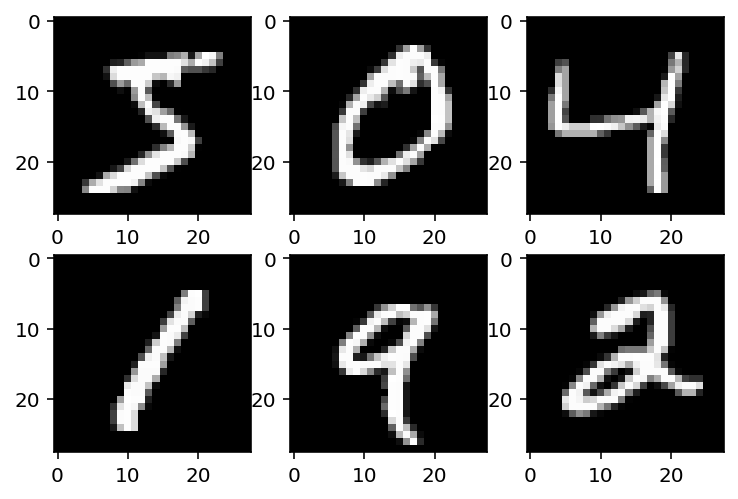

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

### Reshaping data

Convolutional layers in Keras expect inputs with shape (num-samples, width, height, RGB-channels). So far our data has (num-samples, width, height), so we need to add the last dimension. The next chunk of code verify that datashape and reformat accordingly. 

In [8]:
img_rows, img_cols = 28, 28 # wight/height

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
print(f'x_train shape:{ x_train.shape}')
print(f'x_test shape:{ x_test.shape}')

x_train shape:(60000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1)


### Normalizing data

Grayscale values range from 0 (white) to 255 (black). Neural networks tend to converge (learn) faster when data is noramlized. Here, by dividing our data by 255 we get pixel values ranging from 0 (white) to 1 (black). 

In [10]:
print(f'x_train range *before* normalization (max - min): {np.ptp(x_train)}')
print(f'x_test range *before* normalization (max - min): {np.ptp(x_test)}')

x_train range *before* normalization (max - min): 255
x_test range *before* normalization (max - min): 255


In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

In [12]:
print(f'x_train range *after* normalization (max - min): {np.ptp(x_train)}')
print(f'x_test range *after* normalization (max - min): {np.ptp(x_test)}')

x_train range *after* normalization (max - min): 1.0
x_test range *after* normalization (max - min): 1.0


### One-hot encoding target vector

When we move from binary to multi-class classification, we need to change the shape of the target, in this case, from a single vector of shape (num-samples,) to a matrix of shape (num-samples, num-classes). In machine learning this coding scheme is called [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). In statistics is usually called [dummy coding](https://en.wikiversity.org/wiki/Dummy_variable_(statistics)). 

In [13]:
print(f'y_train shape *before* one-hot encoding: {y_train.shape}')
print(f'y_test shape *before* one-hot encoding: {y_test.shape}')

y_train shape *before* one-hot encoding: (60000,)
y_test shape *before* one-hot encoding: (10000,)


In [14]:
num_classes = 10 # Numbers 0-9 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
print(f'y_train shape *after* one-hot encoding: {y_train.shape}')
print(f'y_test shape *after* one-hot encoding: {y_test.shape}')

y_train shape *after* one-hot encoding: (60000, 10)
y_test shape *after* one-hot encoding: (10000, 10)


### LeNet-5 model architecture in Keras

Here is where we ensemble the LeNEt-5 architecture as shown (as closely as possible) in **Figure X**. The comments provide the explanation for each step in the model definition.

In [16]:
# Define a network as a linear stack of layers
model = Sequential() 

# Add 1st convolutional layer with:
    # - features maps: 6
    # - kernel shape: 5 x 5 
    # - activation function post-convolution: hyperbolic tanget (tanh)
model.add(Conv2D(filters=6,kernel_size=(5,5),
                activation='tanh',
                input_shape=input_shape))

# Add 1st pooling layer with kernel shape: 2 x 2 
model.add(AveragePooling2D(pool_size=(2, 2)))

# Add 2st convolutional layer with:
    # - features maps: 16
    # - kernel shape: 5 x 5 
    # - activation function post-convolution: hyperbolic tanget (tanh)
model.add(Conv2D(filters=16,kernel_size=(5,5),
                activation='tanh'))

# Add 2st pooling layer with kernel shape: 2 x 2 
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps           
model.add(Flatten())

# Add 1st fully-connected layer with sigmoid activation function
model.add(Dense(120, activation='sigmoid'))

# Add 2st fully-connected layer with sigmoid activation function
model.add(Dense(84, activation='sigmoid'))

# Add output layer with softmax activation with 10 output classes         
model.add(Dense(num_classes, activation='softmax'))

## LeNet-5 Application: MNIST classification

Keras requieres to compile the model before training. Here is where we add the cost function, the optimizer (learning algorithm, i.e., some verion of backpropagation), and the metrics to be recorderd.

In [17]:
# Compile model with:
    # - cost function: categorical cross-entropy
    # - optimizer: Adadelta (variation of backpropagation)
    # - metrics recorded: accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Now we are ready to train and evaluate LeNet-5 in the MNIST dataset 

In [18]:
epochs = 12 # number of passes of the entire dataset
batch_size = 128 # model iterations before a gradient upgrade

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.7770 - accuracy: 0.7963 - val_loss: 0.2519 - val_accuracy: 0.9313
Epoch 2/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.1974 - accuracy: 0.9443 - val_loss: 0.1362 - val_accuracy: 0.9610
Epoch 3/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.1199 - accuracy: 0.9650 - val_loss: 0.0913 - val_accuracy: 0.9725
Epoch 4/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.0698 - val_accuracy: 0.9786
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0679 - accuracy: 0.9800 - val_loss: 0.0572 - val_accuracy: 0.9818
Epoch 6/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 7/12
60000/60000 [==============================] - 9s 1

Our adapted version of LeNet-5 reached a training accuracy of 99.11% in just 12 iterations. Let's test LeNeT-5 generalization in the 10,000 samples of the test data. 

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss score: {score[0]}')
print(f'Test accuracy score:{ score[1]}')

Test loss score: 0.033295615065703166
Test accuracy score:0.9887999892234802


We obtained a test accuracy score of ~98.88%. Pretty good! Almost identical to the 99.05% of the original LeNet-5 in 1998.

### CIFAR-10 classification with AlexNet

### Reading data from Keras

### Reshaping data

### Normalize data

### One-hot encoding target vector

### AlexNet model architecture in Keras

## AlexNet Application: CIFAR-5 classification

## Limitations

## References

Lindsay, G. (2020). Convolutional Neural Networks as a Model of the Visual System: Past, Present, and Future. Journal of Cognitive Neuroscience, 1–15.